In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import itertools
from scipy.special import kn
from scipy import optimize
from utils import *

In [2]:
# config = '24I/ml_0p01'
config = '24I/ml_0p005'
# config = '32I/ml0p008'
# config = '32I/ml0p006'
# config = '32I/ml0p004'
ainv_24I = [1.784, 0.005]
ainv_32I = [2.382, 0.008]
ainv_ensemble = gen_fake_ensemble(ainv_24I)
# ainv_ensemble = gen_fake_ensemble(ainv_32I)
# f3pt_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/analysis_output/'+config+'/3pt_output.h5'
f3pt_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/analysis_output/'+config+'/SD_output.h5'

In [3]:
f = h5py.File(f3pt_path, 'r')
L, T = f['L'][()], f['T'][()]
V = (L ** 3) * T
# C2pt_tavg = f['C2pt'][()]
C2pt_tavg = np.real(f['pion-00WW'][()])
C2_pion00WP = f['pion-00WP'][()]
C2_fpWP = f['fp-00WP'][()]
C2_fold = fold(C2pt_tavg, T, np.add)            # fold about midpoint. Might not need this for the 3pt analysis

# Compute pion mass

#### pion-00WW

In [4]:
# I've already bootstrapped in the code
C2_boot = np.real(C2pt_tavg)
C2_boot_mu = np.mean(C2_boot, axis = 0)
C2_boot_sigma = np.std(C2_boot, axis = 0, ddof = 1)

In [34]:
# m_eff = get_effective_mass(C2_boot)
meff_00WW = get_cosh_effective_mass(C2_boot)
# m_eff_00WW_mu = np.mean(m_eff_00WW, axis = 0)
# m_eff_00WW_sigma = np.std(m_eff_00WW, axis = 0, ddof = 1)

# fold m_eff over midpoint for a better fit
meff_00WW_folded = fold_meff(meff_00WW, T)
meff_00WW_folded_mu = np.mean(meff_00WW_folded, axis = 0)
meff_00WW_folded_sigma = np.std(meff_00WW_folded, axis = 0, ddof = 1)

<IPython.core.display.Javascript object>


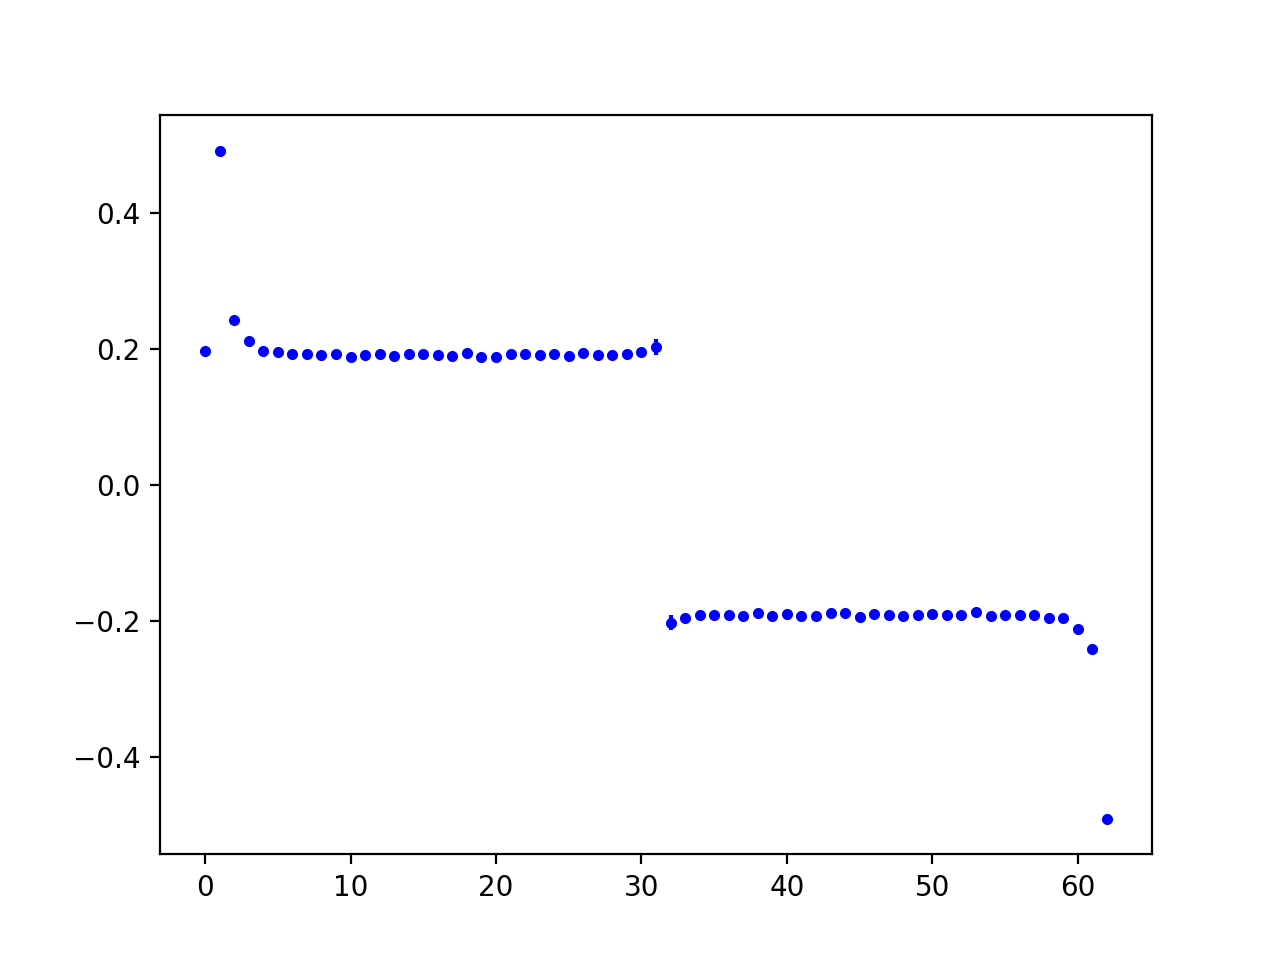

In [36]:
meff_00WW_mu = np.mean(meff_00WW, axis = 0)
meff_00WW_sigma = np.std(meff_00WW, axis = 0, ddof = 1)
plt.figure()
plt.errorbar(range(meff_00WW_mu.shape[0]), meff_00WW_mu, yerr = meff_00WW_sigma, fmt = '.', c = 'b')
plt.show()

In [6]:
# perform fit over all ranges with fit_constant_allrange
fits_00WW, stats_00WW, meff_00WW, weights_00WW = fit_constant_allrange(meff_00WW_folded)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
78 range(3, 7) 0.13569613448983459 0.19364940723729326 0.000750212327509723 241101.0400802409
79 range(3, 8) 0.14110628191735974 0.19327768677969612 0.000739260753320578 258196.91418808862
80 range(3, 9) 0.20414016286780023 0.19311442914709645 0.0007362410812811498 376606.97852859047
81 range(3, 10) 0.031402493403992586 0.19253836015289275 0.0006956431808187251 64891.98641654292
82 range(3, 11) 0.04542822269350674 0.19235663879774673 0.0007092760320444441 90301.54426983967
83 range(3, 12) 0.07275892753199291 0.19232867570724568 0.0007019345785880609 147670.25157681105
84 range(3, 13) 0.05773736845305233 0.19204712610913244 0.0006665714113776567 129946.21055797399
85 range(3, 14) 0.08596104474774245 0.1920141127593716 0.0006513185015487282 202635.18398170648
86 range(3, 15) 0.1167128152168922 0.19208573655845845 0.0006352758920114342 289197.0079511229
87 range(3, 16) 0.12124752039013485 0.19188996636700764 

173 range(7, 16) 0.6991909643551085 0.19109052030004492 0.0006430460984703176 1690875.3467042958
174 range(7, 17) 0.7319979699103545 0.19097888524223133 0.0006345216361026218 1818096.8143258449
175 range(7, 18) 0.5486608310446892 0.19121733523203022 0.0006312073433671693 1377082.2215509305
176 range(7, 19) 0.36107414155031187 0.19095661828558919 0.0006685972355241547 807731.8987290973
177 range(7, 20) 0.3112774932725595 0.19078258250355978 0.0006296360166840172 785178.8540507413
178 range(7, 21) 0.3155515004002976 0.19089215756931485 0.0006198238139156099 821360.3488841106
179 range(7, 22) 0.3380387393672238 0.19099392082840486 0.0006469544126543096 807642.4074371151
180 range(7, 23) 0.3855511286133909 0.1909115197369831 0.0006047725451715759 1054138.9100431106
181 range(7, 24) 0.39143432293042274 0.19100600588987326 0.0006183427651273335 1023765.1382715696
182 range(7, 25) 0.33387264609328643 0.19086085969722547 0.0006021992781763821 920662.3386226494
183 range(7, 26) 0.29346294751089

263 range(12, 21) 0.18971780490588347 0.1908329029183592 0.0006357268165716461 469425.8790022743
264 range(12, 22) 0.2140356458436211 0.1909831733576173 0.0006633815125538922 486361.71259437
265 range(12, 23) 0.2650800455263099 0.19087232396703763 0.0006028213561555072 729457.1359824708
266 range(12, 24) 0.27463431960500273 0.19100147290035618 0.0006182516511834715 718495.8068835721
267 range(12, 25) 0.22854787982222358 0.19081173348749159 0.000599132625605483 636694.7335086877
268 range(12, 26) 0.19453625006979347 0.19096487245850927 0.0006176180960972649 509988.6555356844
269 range(12, 27) 0.2505583961331589 0.19096072812237416 0.0005767998327230289 753110.5107782077
270 range(12, 28) 0.3081002872889911 0.1909870579464165 0.0005788562906902997 919497.5758880129
271 range(12, 29) 0.3658810011117489 0.19101493257590124 0.0005768710403374821 1099467.4689545634
272 range(12, 30) 0.2748663080809637 0.191113206403653 0.0005522471075560271 901269.3653133528
273 range(13, 17) 0.5978075109573

354 range(20, 28) 0.4867155570837053 0.1913088992271793 0.0006040530141755881 1333905.6634484648
355 range(20, 29) 0.5908846205248575 0.19133976008375053 0.000604865091984888 1615048.7797040022
356 range(20, 30) 0.46034699325185224 0.19151117589367608 0.0005693828875438957 1419961.2399726228
357 range(21, 25) 0.2593777211339885 0.1907696293341309 0.000709123602430458 515808.8496305619
358 range(21, 26) 0.219579404409656 0.19118450400732953 0.0007339575010394667 407614.6421180749
359 range(21, 27) 0.3296063660701031 0.19112980035859028 0.0006092803814490838 887894.1663844953
360 range(21, 28) 0.4462092538359882 0.19116786959636098 0.0006118851439183114 1191787.3044408644
361 range(21, 29) 0.5551894235346722 0.1912120914243654 0.000618886483200419 1449503.235065536
362 range(21, 30) 0.4091709652118674 0.19140292772612724 0.0005812064037824584 1211278.5514701698
363 range(22, 26) 0.16361876889552782 0.19092409040461208 0.0007613734102620362 282252.44273753074
364 range(22, 27) 0.275771413

In [7]:
ampi_pion00WW_bar, ampi_pion00WW_sigma = analyze_accepted_fits(meff_00WW, weights_00WW)
print('meff on pion-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: ' + str(ampi_pion00WW_bar) \
      + ' \pm ' + str(ampi_pion00WW_sigma))

meff on pion-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: 0.191134669605731 \pm 0.0007193493400722331


<IPython.core.display.Javascript object>


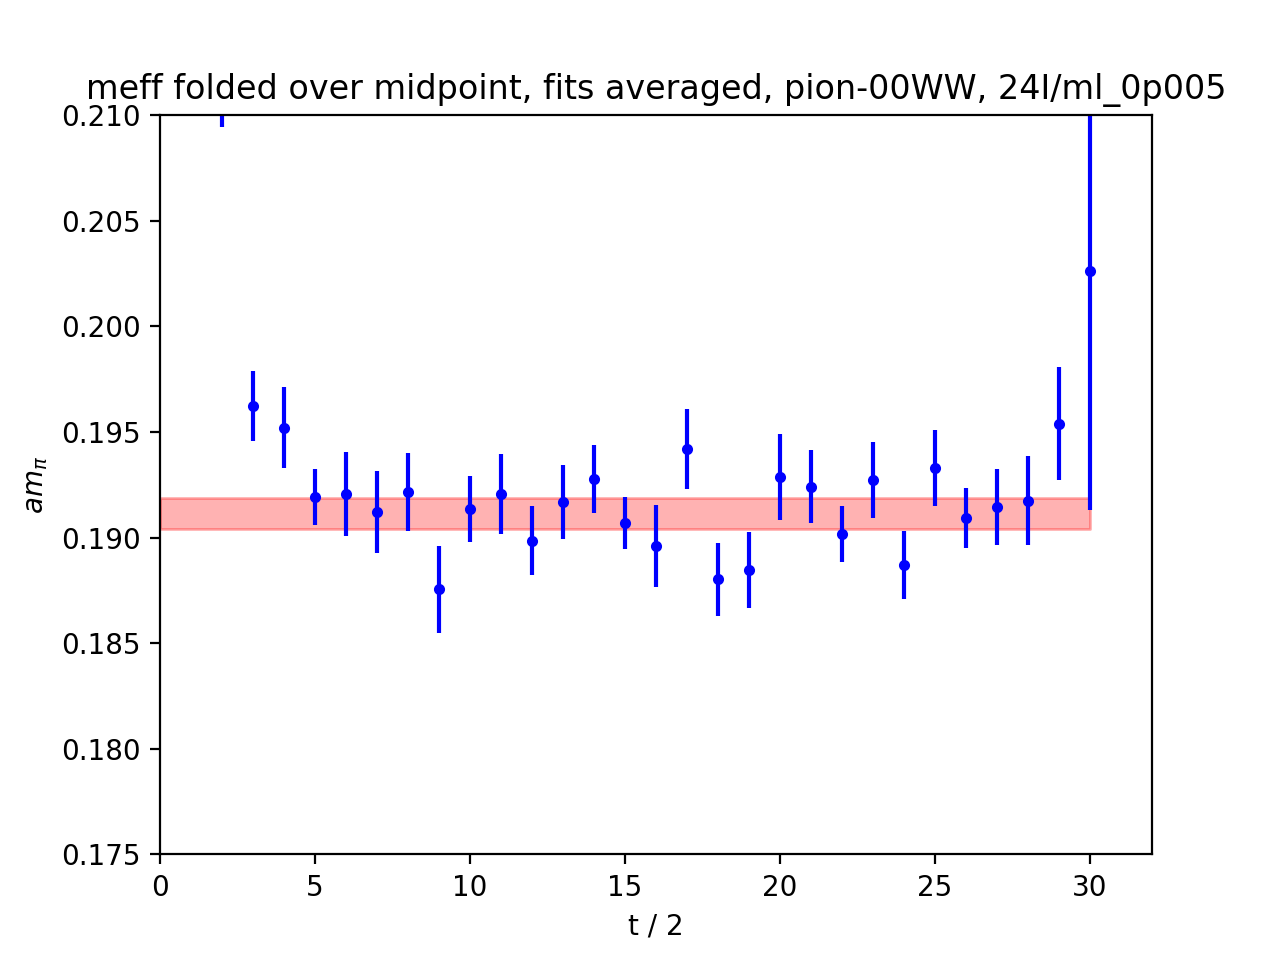

In [19]:
t_range = range(meff_00WW_folded_mu.shape[0])
plt.figure()
plt.errorbar(t_range, meff_00WW_folded_mu, yerr = meff_00WW_folded_sigma, fmt = '.', c = 'b')
plt.fill_between(t_range, ampi_pion00WW_bar - ampi_pion00WW_sigma, ampi_pion00WW_bar + ampi_pion00WW_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
plt.ylim((0.175, 0.21))
plt.title('meff folded over midpoint, fits averaged, pion-00WW, ' + config)
plt.xlabel('t / 2')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### pion-00WP

In [24]:
# get effective mass for pion-00WP
meff_00WP = get_cosh_effective_mass(C2_pion00WP)
meff_00WP_folded = fold_meff(meff_00WP, T)

meff_00WP_folded_mu = np.mean(meff_00WP_folded, axis = 0)
meff_00WP_folded_sigma = np.std(meff_00WP_folded, axis = 0, ddof = 1)

In [10]:
fits_00WP, stats_00WP, meff_00WP, weights_00WP = fit_constant_allrange(meff_00WP_folded)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
125 range(5, 9) 0.10670629859793213 0.1900100980475942 0.0005556667045650294 345590.11042981443
126 range(5, 10) 0.08462723091924176 0.19017915207555675 0.0005612259832106865 268679.5372785993
127 range(5, 11) 0.09089224881981511 0.19028749758090263 0.0005677876017558147 281938.9244645389
128 range(5, 12) 0.09868534639841592 0.19037959476806793 0.0005706773580200396 303020.06422887224
129 range(5, 13) 0.12375114785844364 0.19044313148499395 0.0005691104282703484 382081.6219556926
130 range(5, 14) 0.15317985828828884 0.19049825278965715 0.0005623413403786919 484397.2176865311
131 range(5, 15) 0.18691751911529297 0.19054313475180432 0.000557887648416392 600560.1559257827
132 range(5, 16) 0.2359461153856752 0.1905726620026865 0.0005557381686703766 763963.0964560367
133 range(5, 17) 0.2968400495977743 0.19059310557056539 0.0005550250132890905 963601.3143232956
134 range(5, 18) 0.3679278541153219 0.190605858705

211 range(9, 17) 0.9999991429247246 0.1909471558440449 0.0005951896549801533 2822857.0084326123
212 range(9, 18) 0.99999831701602 0.1909246504994401 0.0005906370553575401 2866539.2230420006
213 range(9, 19) 0.9999951023624319 0.1908975268287516 0.0005857683484361593 2914379.2799467626
214 range(9, 20) 0.9999987526688666 0.1909066692045645 0.000584592353494449 2926127.1744411997
215 range(9, 21) 0.9999995284573456 0.1909185997318055 0.0005854005986503525 2918054.9830409526
216 range(9, 22) 0.9999995915204062 0.19093454565795553 0.000588356219974027 2888810.9688138403
217 range(9, 23) 0.9999993115132554 0.19095355283617446 0.0005915705304296593 2857502.629681893
218 range(9, 24) 0.9999984145060491 0.19097580079083426 0.0005933675150687198 2840218.674348647
219 range(9, 25) 0.9999992078024741 0.1909882322298996 0.0005944375688743881 2830004.703170926
220 range(9, 26) 0.9999997232809859 0.19099627740906994 0.0005938857206993038 2835267.980121732
221 range(9, 27) 0.9999998994247203 0.191004

304 range(15, 23) 0.9981911620749239 0.1909370313843632 0.0006259826654711335 2547352.851605425
305 range(15, 24) 0.9979361015010075 0.19097726357728104 0.0006280339522294344 2530093.0192332645
306 range(15, 25) 0.999024178823471 0.19099792845054608 0.0006284797875082322 2529259.38104861
307 range(15, 26) 0.9996320361522467 0.19101001459168215 0.0006262724610827103 2548669.583063305
308 range(15, 27) 0.9998614768968439 0.191021632784226 0.0006241735966426282 2566427.788416539
309 range(15, 28) 0.9998424381224428 0.19105126381985715 0.0006235765876061131 2571295.348474444
310 range(15, 29) 0.9982511791594926 0.1911049759920279 0.0006247713528401287 2557393.8470653826
311 range(15, 30) 0.9648422134792107 0.19117627966535622 0.0006264200116654311 2458810.447498749
312 range(16, 20) 0.9838459334060263 0.19080852586799515 0.0006133264911007727 2615433.2953685443
313 range(16, 21) 0.9907995510440972 0.19085478952772722 0.0006188789786109828 2586868.4165942874
314 range(16, 22) 0.993346074907

In [11]:
ampi_pion00WP_bar, ampi_pion00WP_sigma = analyze_accepted_fits(meff_00WP, weights_00WP)
print('meff on pion-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: ' + str(ampi_pion00WP_bar) \
      + ' \pm ' + str(ampi_pion00WP_sigma))

meff on pion-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: 0.1909827061194223 \pm 0.0006320677786311684


<IPython.core.display.Javascript object>


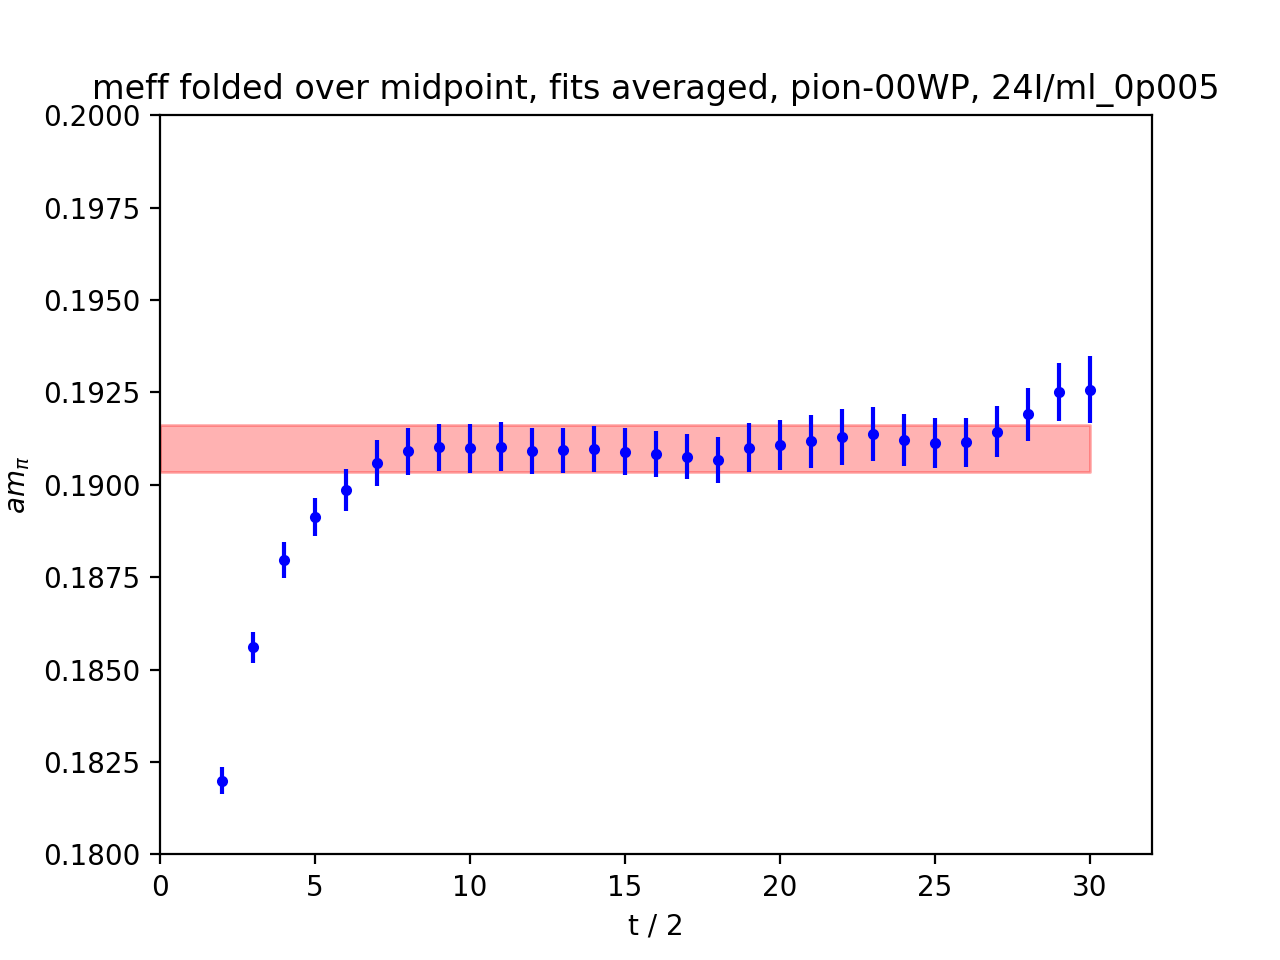

In [18]:
plt.figure()
plt.errorbar(t_range, meff_00WP_folded_mu, yerr = meff_00WP_folded_sigma, fmt = '.', c = 'b')
plt.fill_between(t_range, ampi_pion00WP_bar - ampi_pion00WP_sigma, ampi_pion00WP_bar + ampi_pion00WP_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
plt.ylim((0.18, 0.2))
plt.title('meff folded over midpoint, fits averaged, pion-00WP, ' + config)
plt.xlabel('t / 2')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### fp-00WP

In [37]:
# meff_fpWP = get_cosh_effective_mass(C2_fpWP)
meff_fpWP = get_effective_mass(C2_fpWP)
meff_fpWP_folded = fold_meff(meff_fpWP, T)

meff_fpWP_folded_mu = np.mean(meff_fpWP_folded, axis = 0)
meff_fpWP_folded_sigma = np.std(meff_fpWP_folded, axis = 0, ddof = 1)

<IPython.core.display.Javascript object>


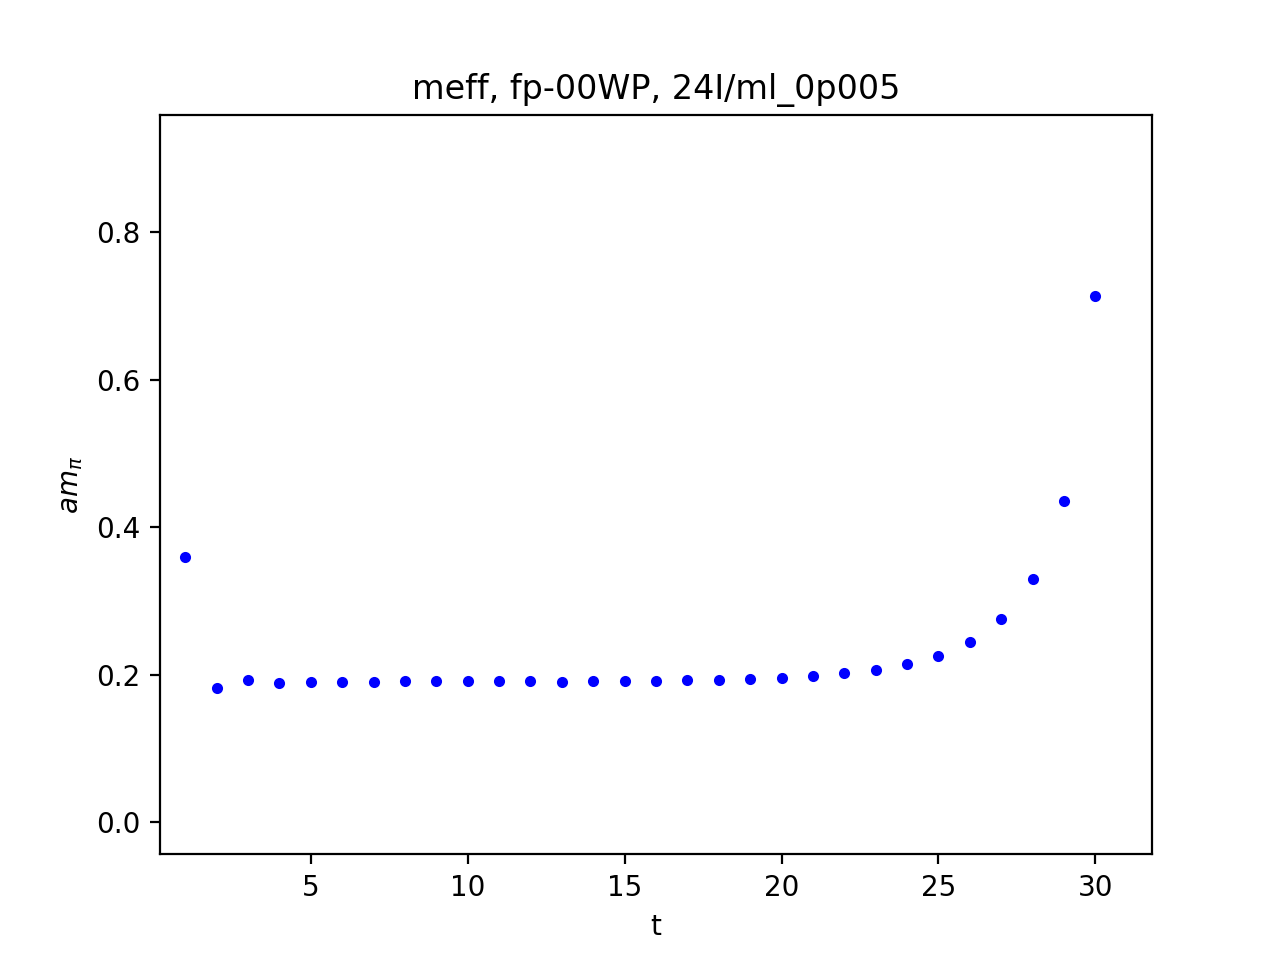

In [38]:
meff_fpWP_mu = np.mean(meff_fpWP, axis = 0)
meff_fpWP_sigma = np.std(meff_fpWP, axis = 0, ddof = 1)
plt.figure()
plt.errorbar(range(meff_fpWP.shape[1]), meff_fpWP_mu, yerr = meff_fpWP_sigma, fmt = '.', c = 'b')
plt.xlim((0, T))
# plt.ylim((0.18, 0.22))
plt.title('meff, fp-00WP, ' + config)
plt.xlabel('t')
plt.ylabel('$a m_{\\pi}$')
plt.show()

In [39]:
fits_fpWP, stats_fpWP, meff_fpWP, weights_fpWP = fit_constant_allrange(meff_fpWP_folded)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
78 range(3, 7) 0.3550910315033414 0.19011038742698091 0.000547212754304428 1185843.236694424
79 range(3, 8) 0.240298919176692 0.19029709286288055 0.0005486836353988322 798192.793612887
80 range(3, 9) 0.2108232812689724 0.190421514189799 0.0005530555666700647 689256.7572225416
81 range(3, 10) 0.26792050227086617 0.1904765494703786 0.0005593064279195872 856458.5072444223
82 range(3, 11) 0.2588776235584218 0.19056184196494347 0.000559117269008665 828111.280974313
83 range(3, 12) 0.2566052431088108 0.19062817621269282 0.0005641569165197506 806242.5080920907
84 range(3, 13) 0.28364818895682076 0.19068195393259185 0.0005627139761278403 895786.7025423691
85 range(3, 14) 0.23152080930675698 0.19075509942181793 0.0005636541815530199 728726.5043596283
86 range(3, 15) 0.18739450352096876 0.19081985119474737 0.0005673683104616011 582139.0032340605
87 range(3, 16) 0.1009719595661978 0.19091233045022551 0.00056453453451

In [40]:
ampi_fpWP_bar, ampi_fpWP_sigma = analyze_accepted_fits(meff_fpWP, weights_fpWP)
print('meff on fp-00WP, avg over all fit ranges with cut ϵ = 0.01 on pvals: ' + str(ampi_fpWP_bar) \
      + ' \pm ' + str(ampi_fpWP_sigma))

meff on fp-00WP, avg over all fit ranges with cut ϵ = 0.01 on pvals: 0.19116243485644102 \pm 0.0006842627909964653


<IPython.core.display.Javascript object>


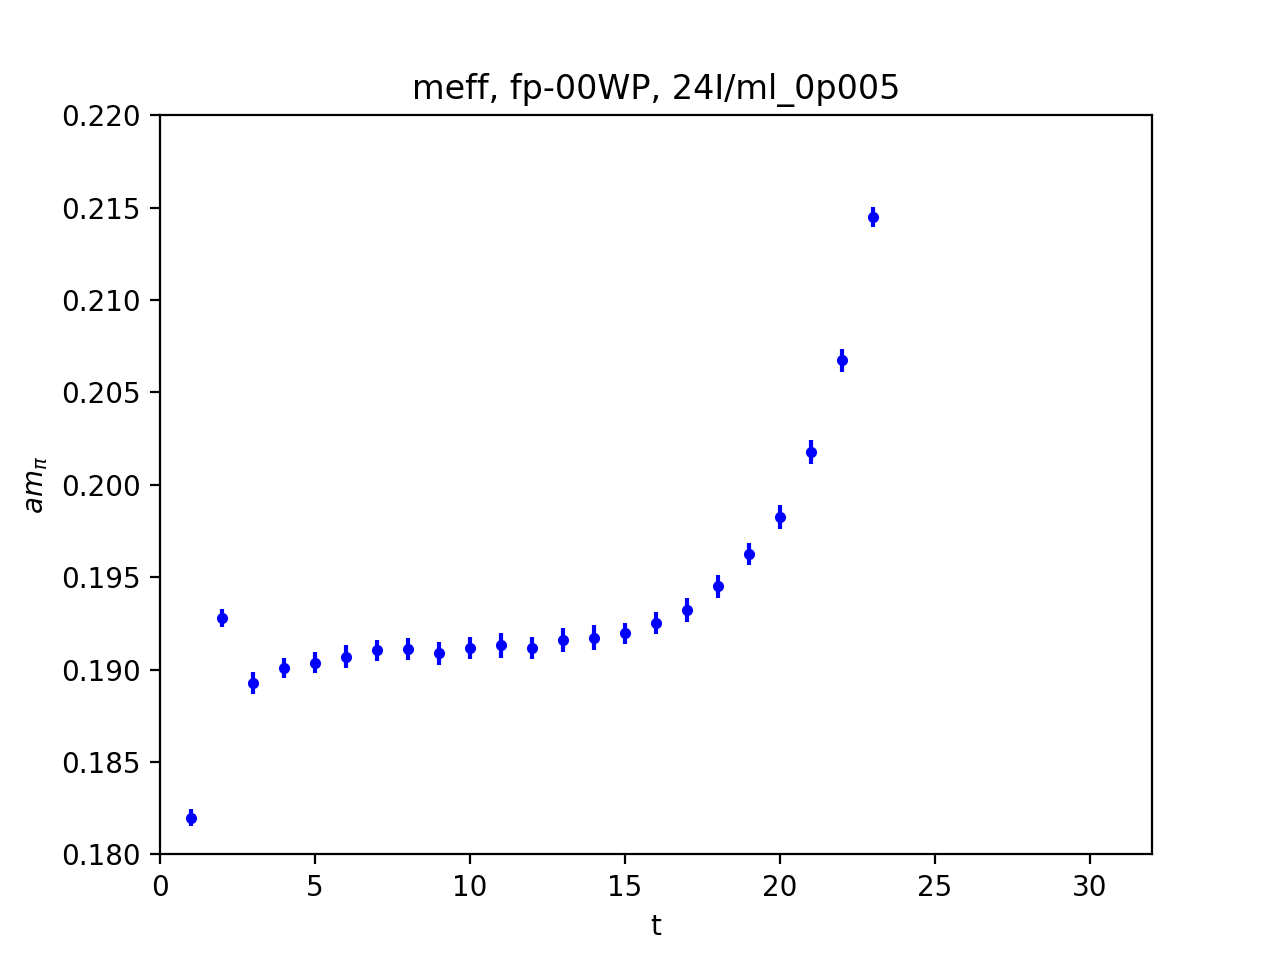

In [41]:
plt.figure()
plt.errorbar(range(meff_00WP_folded.shape[1]), meff_fpWP_folded_mu, yerr = meff_fpWP_folded_sigma, fmt = '.', c = 'b')
plt.xlim((0, T // 2))
plt.ylim((0.18, 0.22))
plt.title('meff, fp-00WP, ' + config)
plt.xlabel('t')
plt.ylabel('$a m_{\\pi}$')
plt.show()

In [ ]:
# Play with the correlators

#### Simultaneous fit for pion-00WP, pion-00WW, fp-00WP

In [ ]:
meff_all = [m_eff_00WW, m_eff_00WP]

# Compute ratio of renormalization coefficients

In [ ]:
# read in bootstrapped, t-averaged curly A and A data and construct ratio. C2_A[t] is evaluated at t - 1/2
C2_curlyA = np.real(f['za_curlyA'][()])
C2_A = np.real(f['za_A'][()])
# C2_A = np.real(f['za_curlyA'][()])
# C2_curlyA = np.real(f['za_A'][()])
Zratio_boot = (C2_curlyA + np.roll(C2_curlyA, +1, axis = 1))/(4.0*C2_A)+C2_curlyA/(C2_A + np.roll(C2_A, -1, axis = 1))
Zratio_boot_mu = np.mean(Zratio_boot, axis = 0)
Zratio_boot_sigma = np.std(Zratio_boot, axis = 0, ddof = 1)

In [ ]:
# fit_range_Zratio = range(15, 50)
fit_range_Zratio = range(15, 40)
Zratio_fits, chi2_Zratio, ndof_Zratio = fit_constant(fit_range_Zratio, Zratio_boot)
chi2_ndof_Zratio = chi2_Zratio / ndof_Zratio
Zratio_mu = np.mean(Zratio_fits, axis = 0)
Zratio_sigma = np.std(Zratio_fits, axis = 0, ddof = 1)
print('ZA / Z_curlyA = ' + str(Zratio_mu) + ' \pm ' + str(Zratio_sigma))
print('chi^2 / ndof for this fit = ' + str(chi2_ndof_Zratio))

In [ ]:
window_size = 0.001
plt.figure()
plt.errorbar(range(Zratio_boot_mu.shape[0]), Zratio_boot_mu, yerr = Zratio_boot_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_Zratio, Zratio_mu - Zratio_sigma, Zratio_mu + Zratio_sigma, color = 'r', alpha = 0.3)
# plt.xlim((0, T // 2))
# plt.ylim((Zratio_mu - window_size, Zratio_mu + window_size))
plt.ylim((0.715, 0.721))
plt.title('Ratio ZA / Z_curlyA, ' + config)
plt.xlabel('T')
plt.ylabel('ZA / Z_curlyA')
plt.show()

# Compute pion decay constant with a few different methods

### (Method 1) Divide out time dependence and fit to a constant

In [ ]:
# get overlap factor for the wall source. Divide out by the exponentials
time_dep_plus = np.zeros((n_boot, T), dtype = np.float64)
time_dep_minus = np.zeros((n_boot, T), dtype = np.float64)
for bidx in range(n_boot):
    for t in range(T):
        time_dep_plus[bidx, t] = np.exp(-ampi_00WW_boot[bidx] * t) + np.exp(-ampi_00WW_boot[bidx] * (T - t))
        time_dep_minus[bidx, t] = np.exp(-ampi_00WW_boot[bidx] * t) - np.exp(-ampi_00WW_boot[bidx] * (T - t))
# for the pion-pion correlators, use + and for the axial-pion correlator use -
pion00WW_overlap_sq_boot = np.real(C2_boot / time_dep_plus)
for bidx in range(n_boot):
    pion00WW_overlap_sq_boot[bidx,:] = pion00WW_overlap_sq_boot[bidx, :] * (2 * ampi_00WW_boot[bidx]) * (L ** 3)#*ainv_ensemble[bidx])
pion00WW_overlap_boot = np.sqrt(pion00WW_overlap_sq_boot)        # this should be N_pionOOWW
# pion00WW_overlap_boot = pion00WW_overlap_sq_boot        # this should be N_pionOOWW
pion00WW_overlap_mu = np.mean(pion00WW_overlap_boot, axis = 0)
pion00WW_overlap_sigma = np.std(pion00WW_overlap_boot, axis = 0, ddof = 1)

In [ ]:
# fit_range_pion00WW = range(15, 45)
fit_range_pion00WW = range(20, 40)
N_pion00WW, chi2_N_pion00WW, ndof_pion00WW = fit_constant(fit_range_pion00WW, pion00WW_overlap_boot)
chi2_ndof_N_pion00WW = chi2_N_pion00WW / ndof_pion00WW
N_pion00WW_mu = np.mean(N_pion00WW)
N_pion00WW_sigma = np.std(N_pion00WW, ddof = 1)
print('Overlap pion-00WW fit: N_P^WW = ' + np.format_float_scientific(N_pion00WW_mu) + '\pm ' \
      + np.format_float_scientific(N_pion00WW_sigma))
print('chi^2 / ndof for this fit: ' + str(chi2_ndof_N_pion00WW))
# N^2 / 2m = 2.229(19)e
# np.sqrt(N_pion00WW_mu * 2 * 432.2 * 32 / 4)    # this is about what |N| is? I'm just putting random numbers together

In [ ]:
# np.sqrt((L ** 3) * N_pion00WW_mu * 2 * ampi_mu)

In [ ]:
# Extract overlap
plt.figure()
plt.errorbar(range(T), pion00WW_overlap_mu, pion00WW_overlap_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_pion00WW, N_pion00WW_mu - N_pion00WW_sigma, N_pion00WW_mu \
                 + N_pion00WW_sigma, color = 'r', alpha = 0.3)
plt.title('Overlap factor for pion-00WW, |N_P^WW|')
# plt.title('Overlap factor for pion-00WW, N_P^2 / 2mpi')
plt.xlabel('t')
plt.ylabel('|Overlap|')
plt.ylim((0.95 * (N_pion00WW_mu - N_pion00WW_sigma), 1.05 * (N_pion00WW_mu + N_pion00WW_sigma)))
plt.show()

In [ ]:
# 00WP overlap
pion00WP_overlap_sq_boot = np.real(C2_pion00WP / time_dep_plus)
for bidx in range(n_boot):
    pion00WP_overlap_sq_boot[bidx,:] = pion00WP_overlap_sq_boot[bidx, :] * (2 * ampi_00WW_boot[bidx]) * (L ** 3)
pion00WP_overlap_boot = np.sqrt(pion00WP_overlap_sq_boot)        # this should be N_pionOOWW
pion00WP_overlap_mu = np.mean(pion00WP_overlap_boot, axis = 0)
pion00WP_overlap_sigma = np.std(pion00WP_overlap_boot, axis = 0, ddof = 1)

In [ ]:
fit_range_pion00WP = range(15, 45)
# fit_range_pion00WP = range(15, 30)
# fit_range_pion00WP = range(35, 50)
N_pion00WP, chi2_N_pion00WP, ndof_N_pion00WP = fit_constant(fit_range_pion00WP, pion00WP_overlap_boot)
chi2_ndof_N_pion00WP = chi2_N_pion00WP / ndof_N_pion00WP
N_pion00WP_mu = np.mean(N_pion00WP)
N_pion00WP_sigma = np.std(N_pion00WP, ddof = 1)
print('Overlap pion-00WP fit: ' + str(N_pion00WP_mu) + '\pm ' + str(N_pion00WP_sigma))
print('chi^2 / ndof for this fit: ' + str(chi2_ndof_N_pion00WP))

In [ ]:
# Extract overlap
plt.figure()
plt.errorbar(range(T), pion00WP_overlap_mu, pion00WP_overlap_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_pion00WP, N_pion00WP_mu - N_pion00WP_sigma, N_pion00WP_mu + N_pion00WP_sigma, color = 'r', alpha = 0.3)
plt.title('Overlap factor for pion-00WP, |N_P^WP|')
plt.xlabel('t')
plt.ylabel('|Overlap|')
plt.ylim((0.95 * (N_pion00WP_mu - N_pion00WP_sigma), 1.05 * (N_pion00WP_mu + N_pion00WP_sigma)))
plt.show()

In [ ]:
# fpOOWW: antisymmetric and time_dep_minus goes to 0 at T / 2
fp00WP_overlap_sq_boot = np.abs(C2_fpWP / time_dep_minus)
# TODO replace this with something that's actually correct-- FOLD AROUND MIDPOINT INSTEAD
fp00WP_overlap_sq_boot[np.isinf(fp00WP_overlap_sq_boot)] = 0
for bidx in range(n_boot):
    fp00WP_overlap_sq_boot[bidx,:] = fp00WP_overlap_sq_boot[bidx, :] * (2 * ampi_00WW_boot[bidx]) * (L ** 3)
# TODO: write out the equations for what overlap factor this is
# fp00WP_overlap_boot = np.sqrt(fp00WP_overlap_sq_boot)
# Since this is mixed axial-pseudoscalar, divide out by the pseudoscalar one
fp00WP_overlap_boot = np.abs(fp00WP_overlap_sq_boot) / np.abs(pion00WP_overlap_boot)
# fold over since it's antisymmetric
fp00WP_overlap_boot = np.real(fold(fp00WP_overlap_boot, T, folder = np.add))
fp00WP_overlap_mu = np.mean(fp00WP_overlap_boot, axis = 0)
fp00WP_overlap_sigma = np.std(fp00WP_overlap_boot, axis = 0, ddof = 1)

In [ ]:
# fit_range_fp00WP = range(10, 30)
fit_range_fp00WP = range(15, 30)
N_fp00WP, chi2_N_fp00WP, ndof_N_fp00WP = fit_constant(fit_range_fp00WP, fp00WP_overlap_boot)
chi2_ndof_N_fp00WP = chi2_N_fp00WP / ndof_N_fp00WP
N_fp00WP_mu = np.mean(N_fp00WP)
N_fp00WP_sigma = np.std(N_fp00WP, ddof = 1)
print('Overlap fp00WP fit: ' + str(N_fp00WP_mu) + '\pm ' + str(N_fp00WP_sigma))
print('chi^2 / ndof for this fit: ' + str(chi2_ndof_N_fp00WP))

In [ ]:
# Extract overlap. Note that we've artifically set the midpoint to 0 as there's a divide by 0 there
plt.figure()
plt.errorbar(range(T // 2 + 1), fp00WP_overlap_mu, fp00WP_overlap_sigma, fmt = '.', c = 'b')
# plt.errorbar(range(T), fp00WP_overlap_mu, fp00WP_overlap_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_fp00WP, N_fp00WP_mu - N_fp00WP_sigma, N_fp00WP_mu + N_fp00WP_sigma, color = 'r', alpha = 0.3)
plt.title('|N_A^WP|')
plt.xlabel('t')
plt.ylabel('|Overlap|')
plt.ylim((0.95 * (N_fp00WP_mu - N_fp00WP_sigma), 1.05 * (N_fp00WP_mu + N_fp00WP_sigma)))
plt.show()

In [ ]:
# combine and get estimate for fpi
vol = L ** 3
afpi_boot = (1 / (ampi_00WW_boot * vol)) * np.abs(N_pion00WP) * np.abs(N_fp00WP) / np.abs(N_pion00WW)
afpi_mu = np.mean(afpi_boot)
afpi_sigma = np.std(afpi_boot, ddof = 1)
print('afpi bare = ' + str(afpi_mu) + ' \pm ' + str(afpi_sigma))

In [ ]:
# Renormalize fpi
afpi_renorm_boot = Zratio_fits * afpi_boot
afpi_renorm_mu = np.mean(afpi_renorm_boot, axis = 0)
afpi_renorm_sigma = np.std(afpi_renorm_boot, axis = 0, ddof = 1)
print('afpi renorm = ' + str(afpi_renorm_mu) + ' \pm ' + str(afpi_renorm_sigma))

### (Method 2) VarPro with results from effective mass fit

In [ ]:
# fit C2_boot at each bootstrap by plugging in our fit result for mpi. Note that m = vector of length N_params
N_params = 1
f0 = lambda m, t : np.exp(-m[0] * t) + np.exp(-m[0] * (T - t))
f_fit = [f0]        # should be a vector of size N_params
A = lambda m : np.array([[f_fit[i](m, t) / C2_boot_sigma[t] for i in range(N_params)] for t in range(T)])
z = np.array([[C2_boot[bidx, t] / C2_boot_sigma[t] for t in range(T)] for bidx in range(n_boot)])
a_boot = np.zeros((n_boot), dtype = np.float64)
for bidx in range(n_boot):
    m_boot = np.array([ampi_00WW_boot[bidx]])    # guess for b
    Ab = A(m_boot)
    #a_boot[bidx] = np.sum(Ab * z[bidx]) / np.sum(Ab * Ab)
    a_boot[bidx] = ahat(Ab, z[bidx])
a_boot_mu = np.mean(a_boot)        # Should expect that a_boot = |N|^2 / 2m
a_boot_sigma = np.std(a_boot, ddof = 1)
print('Method 2, Overlap |N_W|^2 / 2m = ' + np.format_float_scientific(a_boot_mu) + ' \pm ' \
      + np.format_float_scientific(a_boot_sigma))
# 2.318(14) e8

In [ ]:
# 2.3189662580853543e+08 \pm 1.4320112779951137e+06

### (Method 3) VarPro

In [ ]:
# Minimize chi^2 for a(b) and get results for b parameter (which is mpi)
m_varpro = np.zeros((n_boot), dtype = np.float64)
m0 = np.array([ampi_00WW_mu], dtype = np.float64)
for bidx in range(n_boot):
    out = optimize.minimize(chi2_varpro, m0, args = (A, z[bidx]), method = 'Powell')
    m_varpro[bidx] = out['x']

In [ ]:
m_varpro_mu = np.mean(m_varpro)
m_varpro_sigma = np.std(m_varpro, ddof = 1)
print('mpi from varpro = ' + str(m_varpro_mu) + ' \pm ' + str(m_varpro_sigma))

In [ ]:
# get back overlap factor
varpro_overlap = np.array([ahat(A([m_varpro[bidx]]), z[bidx]) for bidx in range(n_boot)])
varpro_overlap_mu = np.mean(varpro_overlap)
varpro_overlap_sigma = np.std(varpro_overlap, ddof = 1)
print('Varpro overlap factor: |N|^2 / 2m = ' + np.format_float_scientific(varpro_overlap_mu) + ' \pm ' \
      + np.format_float_scientific(varpro_overlap_sigma))

# Save data for mpi, fpi, ZA

In [ ]:
print('a*m_pi for pion-00WW = ' + str(ampi_00WW_mu) + ' \pm ' + str(ampi_00WW_sigma))
print('ZA / Z_curlyA = ' + str(Zratio_mu) + ' \pm ' + str(Zratio_sigma))
print('Overlap pion-00WW fit: N_P^WW = ' + np.format_float_scientific(N_pion00WW_mu) + '\pm ' \
      + np.format_float_scientific(N_pion00WW_sigma))
print('afpi bare = ' + str(afpi_mu) + ' \pm ' + str(afpi_sigma))
print('afpi renorm = ' + str(afpi_renorm_mu) + ' \pm ' + str(afpi_renorm_sigma))

In [ ]:
# fout_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/analysis_output/'+config+'/twopt_out.h5'
# fout = h5py.File(fout_path, 'w')
# fout['ampi'] = ampi_00WW_boot
# fout['afpi'] = afpi_renorm_boot
# fout['ZA_ratio'] = Zratio_boot
# fout.close()

## Old fitting code which chooses a fit range by hand

#### pion-00WW

In [ ]:
m_eff_00WW_mu = np.mean(m_eff_00WW, axis = 0)
m_eff_00WW_sigma = np.std(m_eff_00WW, axis = 0, ddof = 1)

# fit_range = range(5, 20)
fit_range_00WW = range(15, 30)
# fit_range = range(10, 26)
ampi_00WW_boot, ampi_00WW_chi2, ampi_00WW_ndof = fit_constant(fit_range_00WW, m_eff_00WW)
ampi_00WW_chi2_ndof = ampi_00WW_chi2 / ampi_00WW_ndof
ampi_00WW_mu = np.mean(ampi_00WW_boot)
ampi_00WW_sigma = np.std(ampi_00WW_boot, ddof = 1)
print('a*m_pi for pion-00WW = ' + str(ampi_00WW_mu) + ' \pm ' + str(ampi_00WW_sigma))
print('chi^2 / ndof for this fit = ' + str(ampi_00WW_chi2_ndof))
# m_pi = 0.2412069567584312 \pm 0.00058483300634162

In [ ]:
plt.figure()
plt.errorbar(range(m_eff_00WW_mu.shape[0]), m_eff_00WW_mu, yerr = m_eff_00WW_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_00WW, ampi_00WW_mu - ampi_00WW_sigma, ampi_00WW_mu + ampi_00WW_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
# plt.ylim((0.22, 0.28))
# plt.title('Cosh-corrected effective mass, pion-00WW, ' + config)
plt.ylim((ampi_00WW_mu - 50 * ampi_00WW_sigma, ampi_00WW_mu + 50 * ampi_00WW_sigma))
plt.title('Cosh-corrected effective mass for pion-00WW, ' + config)
plt.xlabel('t / 2')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### pion-00WP

In [ ]:
# save fits to file and use that in chiral extrapolation
fit_range_mpi_00WP = range(15, 30)
ampi_00WP_boot, ampi_00WP_chi2, ampi_00WP_ndof = fit_constant(fit_range_mpi_00WP, m_eff_00WP)
ampi_00WP_chi2_ndof = ampi_00WP_chi2 / ampi_00WP_ndof
ampi_00WP_mu = np.mean(ampi_00WP_boot)
ampi_00WP_sigma = np.std(ampi_00WP_boot, ddof = 1)
print('a*m_pi for 00WP = ' + str(ampi_00WP_mu) + ' \pm ' + str(ampi_00WP_sigma))
print('chi^2 / ndof for 00WP = ' + str(ampi_00WP_chi2_ndof))

In [ ]:
plt.figure()
plt.errorbar(range(m_eff_00WW_mu.shape[0]), m_eff_00WP_mu, yerr = m_eff_00WP_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_mpi_00WP, ampi_00WP_mu - ampi_00WP_sigma, ampi_00WP_mu + ampi_00WP_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
# plt.ylim((0.23, 0.255))
plt.ylim((ampi_00WP_mu - 20 * ampi_00WP_sigma, ampi_00WP_mu + 20 * ampi_00WP_sigma))
plt.title('Cosh-corrected effective mass, pion-00WP, ' + config)
plt.xlabel('T / 2')
plt.ylabel('a * mpi')
plt.show()